# EN506 - Digital Image Processing
## "Streakflow for Crowd Segmentation"

In [8]:
# import libraries
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [9]:
# UFC Dataset: "slow traffic"
cap = cv.VideoCapture("https://ia801505.us.archive.org/10/items/en506-dip/1.mp4")

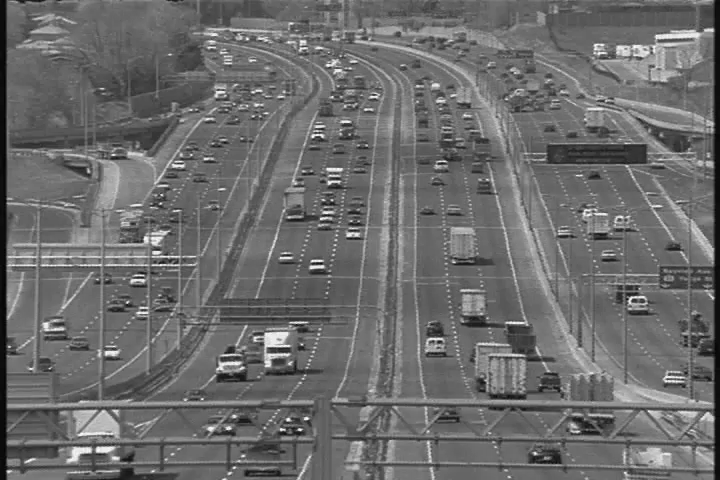

In [10]:
# capture first frame and ground truth
_, f = cap.read()
g = cv.cvtColor(f, cv.COLOR_BGR2GRAY)

cv2_imshow(g)

In [11]:
# random colors
clrs = np.random.randint(0, 255, (100, 3))

# mask image for drawing purposes
msk = np.zeros_like(f)
msk[..., 1] = 255

fc = int(cap.get(cv.CAP_PROP_FRAME_COUNT))-1

In [12]:
for z in range(fc):
  ret, f = cap.read()
  if not ret:
    print('No frames grabbed!')
    break

  g1 = cv.cvtColor(f, cv.COLOR_BGR2GRAY)
  flow = cv.calcOpticalFlowFarneback(g, g1, None, 0.5, 3, 15, 3, 5, 1.2, 0)

  mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
  msk[..., 0] = ang*180/np.pi/2
  msk[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
  bgr = cv.cvtColor(msk, cv.COLOR_HSV2BGR)

  g = g1.copy()

cv.destroyAllWindows()

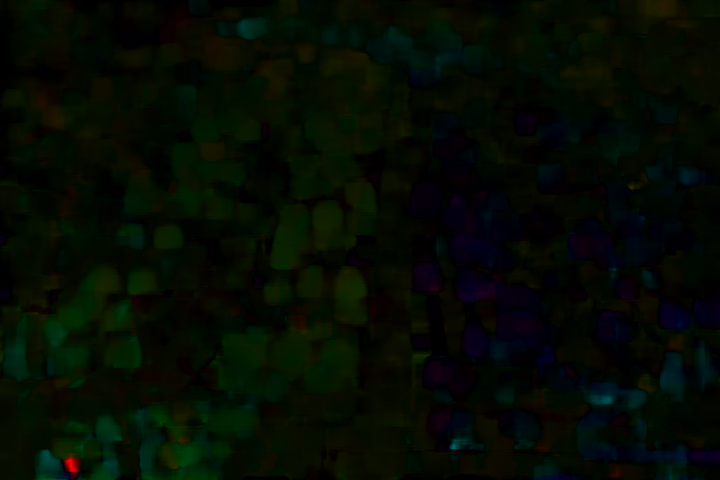

In [13]:
cv2_imshow(bgr)